In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 names=['age','workclass','fnlwgt','education','education-num','marital-status',
                        'occupation','relationship','race','sex','capital-gain','capital-loss',
                        'hours-per-week','native-country','income'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print("The Census Income Data Set has {0[0]} samples and {0[1]} feature attributes".format(data.shape))

The Census Income Data Set has 32561 samples and 15 feature attributes


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

In [6]:
le=LabelEncoder()
attributes=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
data[attributes] = data[attributes].apply(le.fit_transform)

In [7]:
attr = data.iloc[:, :14]
lebel= data.iloc[:, 14]
lebel.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [8]:
X_train,X_test, Y_train, Y_test = train_test_split(attr, lebel, test_size= 0.25,random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
clf_svm_rbf = svm.SVC(kernel='rbf')
clf_svm_rbf.fit(X_train, Y_train)
Y_prediction = clf_svm_rbf.predict(X_test)
clf_svm_rbf = cross_val_score(clf_svm_rbf,attr,lebel,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (clf_svm_rbf.mean(), clf_svm_rbf.std()))

0.80 accuracy with a standard deviation of 0.00


[[5804  355]
 [ 897 1085]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6159
           1       0.75      0.55      0.63      1982

    accuracy                           0.85      8141
   macro avg       0.81      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



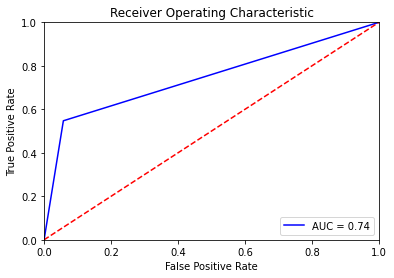

In [12]:
print(confusion_matrix(Y_test,Y_prediction))
print(classification_report(Y_test, Y_prediction))
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
clf_svm_linear = svm.SVC(kernel='linear', C=1)
clf_svm_linear.fit(X_train, Y_train)
Y_prediction = clf_svm_linear.predict(X_test)
result_svm_linear = cross_val_score(clf_svm_linear,attr,lebel,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (result_svm_linear.mean(), result_svm_linear.std()))

In [ ]:
clf_svm_poly = svm.SVC(kernel='poly')
clf_svm_poly.fit(X_train, Y_train)
Y_prediction = clf_svm_poly.predict(X_test)
result_svm_poly = cross_val_score(clf_svm_poly,attr,lebel,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (result_svm_poly.mean(), result_svm_poly.std()))

In [13]:
clf_svm_sig = svm.SVC(kernel='sigmoid')
clf_svm_sig.fit(X_train, Y_train)
Y_prediction = clf_svm_sig.predict(X_test)
result_svm_sig = cross_val_score(clf_svm_sig,attr,lebel,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (result_svm_sig.mean(), result_svm_sig.std()))

0.65 accuracy with a standard deviation of 0.01


Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB
clf_GNB = GaussianNB()
clf_GNB.fit(X_train, Y_train)
Y_prediction_GNB = clf_GNB.predict(X_test)
result_clf_GNB = cross_val_score(clf_GNB,attr,lebel,cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (result_clf_GNB.mean(), result_clf_GNB.std()))

0.80 accuracy with a standard deviation of 0.01


[[5866  293]
 [1304  678]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6159
           1       0.70      0.34      0.46      1982

    accuracy                           0.80      8141
   macro avg       0.76      0.65      0.67      8141
weighted avg       0.79      0.80      0.78      8141



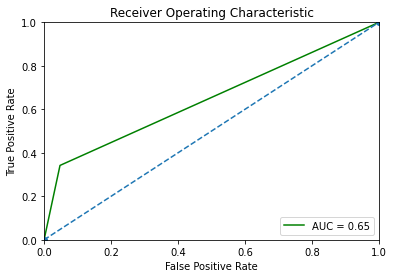

In [10]:
print(confusion_matrix(Y_test,Y_prediction_GNB))
print(classification_report(Y_test, Y_prediction_GNB))
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_prediction_GNB)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'o--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()